In [1]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [2]:
importlib.reload(EyeTraumaAnalysis);

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import cv2

In [4]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
# cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image = cv2.cvtColor(image.img, cv2.COLOR_BGR2RGB) # Change color to RGB (from BGR)
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.img.reshape((-1,3))
# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

In [20]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 5 # Choosing number of cluster
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

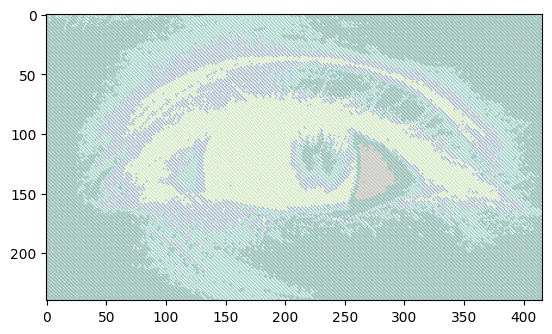

In [22]:
centers = np.uint8(centers) # convert data into 8-bit values

import math
l = len(centers)
incr = 255 / l
color = math.floor(incr)
for i in range(l):
    centers[i] = [color, color, color]
    color = math.floor(color + incr)

segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
segmented_image = segmented_data.reshape((image.img.shape)) # reshape data into the original image dimensions

# segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
# plt.imshow(segmented_image, cmap='gray', vmin=0, vmax=255)
plt.imshow(segmented_image)

In [7]:
centers

array([[ 25,  25,  25],
       [ 50,  50,  50],
       [ 75,  75,  75],
       [100, 100, 100],
       [125, 125, 125],
       [150, 150, 150],
       [175, 175, 175],
       [200, 200, 200],
       [225, 225, 225],
       [250, 250, 250]], dtype=uint8)

In [8]:
# import math
#
# l = len(centers)
# incr = 255 / l
# color = 0
# for i in range(l):
#     centers[i] = [0, 0, color]
#     # cluster = centers[i]
#     # cluster = [0, 0, color]
#     color = math.floor(color + incr)

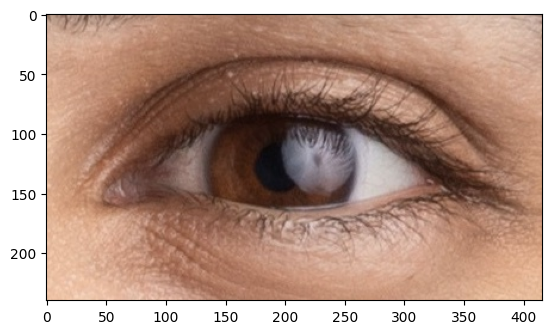

In [9]:
plt.imshow(image.img)

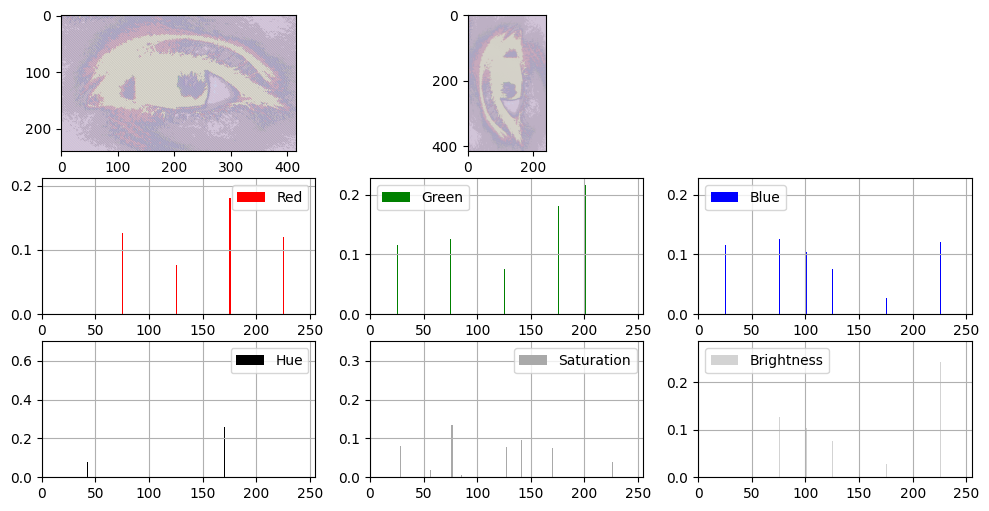

In [10]:
image = segmented_image

img_hsv = mpl.colors.rgb_to_hsv(segmented_image[...,:3]/255.0) * 255

fig, axs = plt.subplots(3, 3, figsize=(12,6))

axs[0,0].imshow(image)

axs[0,1].imshow(np.transpose(segmented_image, axes=[1,0,2]))
axs[0,2].axis("off")

axs[1,0].hist(image[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red");
axs[1,1].hist(image[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green");
axs[1,2].hist(image[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue");

axs[2,0].hist(img_hsv[...,0].ravel(),256,[0,256],density=True, facecolor="black", label="Hue");
axs[2,1].hist(img_hsv[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation");
axs[2,2].hist(img_hsv[...,2].ravel(),256,[0,256],density=True, facecolor="lightgray", label="Brightness");

for ind, ax in enumerate(axs[1:,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()

In [11]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
# img_hsv = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2HSV)
ht, wd, ch = img_hsv.shape;
center = (int(wd/2),int(ht/2));
bottom_region_cutoff = int(ht*95/100)
kernel = np.ones((int(wd/50),int(ht/50)),np.uint8)
# get bottom region as ground truth for skin
region_hsv1 = img_hsv[bottom_region_cutoff:,:,:3]  # :3 removes alpha channel
percentiles1 = np.quantile(region_hsv1,[0.55, 0.95], axis=[0,1])

In [12]:
percentiles1[0]

array([  0.,  51., 250.])

In [13]:
percentiles1[1]

array([170.        , 141.66666667, 250.        ])

In [14]:
skin_threshold = cv2.inRange(segmented_image[:,:,:3], percentiles1[0], percentiles1[1])
target1 = cv2.bitwise_and(image.img,image.img, mask=~skin_threshold)

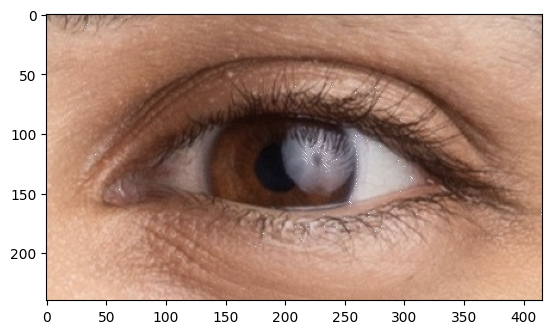

In [15]:
plt.imshow(target1)

In [16]:
percentiles1[0]

array([  0.,  51., 250.])

In [17]:
percentiles1[1]

array([170.        , 141.66666667, 250.        ])